In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve as prc
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import time

df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/banksim.csv')

def fx(x):
    return str(x[1:-1])

def fx2(x):
    if x == "'U'":
        return 7
    else:
        return int(x[1:-1])


df['category'] = df.category.apply(fx)
df['gender'] = df.gender.apply(fx)
df['age'] = df.age.apply(fx2)

le = preprocessing.LabelEncoder()
le.fit(list(set(df['category'])))
df['category'] = le.transform(df['category'])

le.fit(list(set(df['age'])))
df['age'] = le.transform(df['age'])

le.fit(list(set(df['gender'])))
df['gender'] = le.transform(df['gender'])

df_data = df
#X = df.loc[(df.category == 'es_sportsandtoys') | (df.category == 'es_fashion') | (df.category == 'es_travel') | (df.category == 'es_home') |(df.category == 'es_health') | (df.category == 'es_leisure') | df.category == 'es_tech') | (df.category == 'es_otherservices') | (df.category == 'es_barsandrestaurants') |(df.category == 'es_hyper') | (df.category == 'es_wellnessandbeauty')]
y_true = df_data['fraud']

df = df.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri'], axis = 1)
df = df.rename(index=str, columns={"fraud": "Class"})
df_data = df_data.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri', 'fraud'], axis = 1)
df.head()

,step,age,gender,category,amount,Class
0,0,4,2,12,4.55,0
1,0,2,2,12,39.68,0
2,0,4,1,12,26.89,0
3,0,3,2,12,17.25,0
4,0,5,2,12,35.72,0


In [58]:
ones = full_data[(full_data.Class == 1)]
zeroes = full_data[(full_data.Class == 0)][:len(ones)*4]

X = pd.concat([ones, zeroes])
full_data = X
full_data.shape

(36000, 6)

In [59]:
full_data=full_data.sample(frac=1)#randomize the whole dataset
full_features=full_data.drop(["step","Class"],axis=1)
full_labels=pd.DataFrame(full_data[["Class"]])
full_features_array=full_features.values
full_labels_array=full_labels.values

In [60]:
train_features,test_features,train_labels,test_labels=train_test_split(full_features_array,full_labels_array,train_size=0.80)
train_features=normalize(train_features)
test_features=normalize(test_features)

N_Clusters = 2\\
\\
0.8807142430326789
0.8428246013667426
K-Nearest Neighbours\\
Confusion Matrix\\
('tn =', 5676, 'fp =', 98)
('fn =', 316, 'tp =', 1110)
Scores
('Accuracy -->', 0.9425)
('Precison -->', 0.9188741721854304)
('Recall -->', 0.7784011220196353)
('F1 -->', 0.8428246013667426)
Time Taken : 4.5717689991seconds


N_Clusters = 3\\
\\
0.9097980452101625
0.8641887062187276
K-Nearest Neighbours\\
Confusion Matrix\\
('tn =', 5611, 'fp =', 163)
('fn =', 217, 'tp =', 1209)
Scores
('Accuracy -->', 0.9472222222222222)
('Precison -->', 0.8811953352769679)
('Recall -->', 0.8478260869565217)
('F1 -->', 0.8641887062187276)
Time Taken : 4.76784706116seconds


N_Clusters = 5\\
\\
0.9061923863369723
0.8622927180966115
K-Nearest Neighbours\\
Confusion Matrix\\
('tn =', 5622, 'fp =', 152)
('fn =', 230, 'tp =', 1196)
Scores
('Accuracy -->', 0.9469444444444445)
('Precison -->', 0.887240356083086)
('Recall -->', 0.8387096774193549)
('F1 -->', 0.8622927180966115)
Time Taken : 4.96521902084seconds


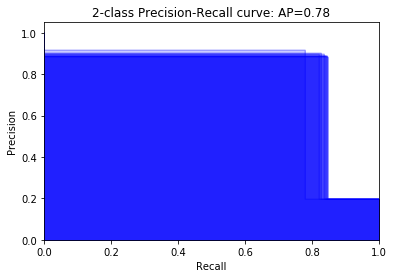

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,f1_score
acuracy = []
precision = []
recall = []
f1 = []
timekm = []
n = [2,3,5,8,10,13,15,17,20]
for i in n:
    print('N_Clusters = ' + str(i) + '\\\\' + '\n' + '\\\\')
    #k_nearest_neighbours_classification
    knn=KNeighborsClassifier(n_neighbors=i,algorithm="kd_tree",n_jobs=-1)
    knn.fit(train_features,train_labels.ravel())
    knn_predicted_test_labels=knn.predict(test_features)

    #calculating confusion matrix for knn
    tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()
    
    print(roc_auc_score(test_labels, knn_predicted_test_labels))
    print(f1_score(test_labels, knn_predicted_test_labels))
    
    #scoring knn
    knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
    knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
    knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
    knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)
    
    precision, recall, _ = prc(test_labels,knn_predicted_test_labels)
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,
                     color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(metrics.average_precision_score(test_labels,knn_predicted_test_labels)))

    #printing
    print("K-Nearest Neighbours\\\\")
    print("Confusion Matrix\\\\")
    print("tn =",tn,"fp =",fp)
    print("fn =",fn,"tp =",tp)
    print("Scores")
    print("Accuracy -->",knn_accuracy_score)
    print("Precison -->",knn_precison_score)
    print("Recall -->",knn_recall_score)
    print("F1 -->",knn_f1_score)
    #time elapsed
    toc=time.time()
    elapsedtime=toc-tic
    print("Time Taken : "+str(elapsedtime)+"seconds\n\n")
    
    acuracy += [knn_accuracy_score,]
    precision += [knn_precison_score,]
    recall += [knn_recall_score,]
    f1 += [knn_f1_score,]
    timekm += [elapsedtime,]

Text(0.5,0,u'Acuracy Scores')

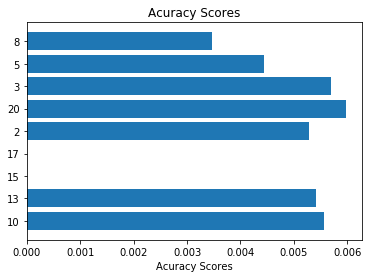

In [67]:
pyplot.title('Acuracy Scores')
pyplot.barh(['2','3','5','8','10','13','15','17','20'], list(map(lambda x: x - min(acuracy) + 0.001, acuracy)), align='center')
pyplot.xlabel('Acuracy Scores')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

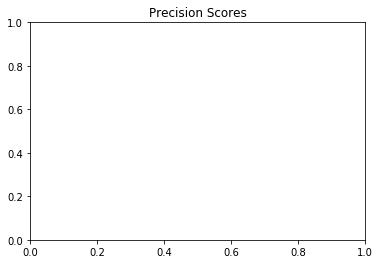

In [63]:
pyplot.title('Precision Scores')
pyplot.barh(['2','3','5','8','10','13','15','17','20'], list(map(lambda x: x - min(precision) + 0.001, precision)), align='center')
pyplot.xlabel('Precision Scores')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

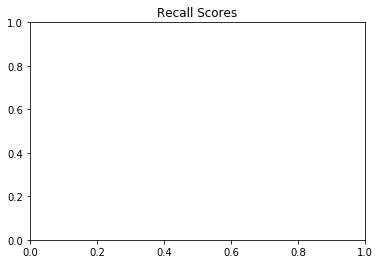

In [64]:
pyplot.title('Recall Scores')
pyplot.barh(['2','3','5','8','10','13','15','17','20'], list(map(lambda x: x - min(recall) + 0.001, recall)), align='center')
pyplot.xlabel('Recall Scores')

In [ ]:
pyplot.title('F1 Scores')
pyplot.barh(['2','3','5','8','10','13','15','17','20'], list(map(lambda x: x - min(f1) + 0.001, f1)), align='center')
pyplot.xlabel('F1 Scores')

In [ ]:

pyplot.title('Time Scores')
pyplot.barh(['2','3','5','8','10','13','15','17','20'], list(map(lambda x: x - min(timekm) + 0.001, timekm)), align='center')
pyplot.xlabel('Time Scores')

In [ ]:
print('N_Clusters = ' + str(i) + '\\\\' + '\n' + '\\\\')
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=13,algorithm="kd_tree",n_jobs=-1)

In [ ]:
%%timeit
knn.fit(train_features,train_labels).decision_function(test_features)

In [15]:
%%timeit
knn_predicted_test_labels=knn.predict(test_features)

307 ms ± 49.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
#calculating confusion matrix for knn
tn,fp,fn,tp=confusion_matrix(test_labels,knn_predicted_test_labels).ravel()

print(roc_auc_score(test_labels, knn_predicted_test_labels))
print(f1_score(test_labels, knn_predicted_test_labels))

#scoring knn
knn_accuracy_score=accuracy_score(test_labels,knn_predicted_test_labels)
knn_precison_score=precision_score(test_labels,knn_predicted_test_labels)
knn_recall_score=recall_score(test_labels,knn_predicted_test_labels)
knn_f1_score=f1_score(test_labels,knn_predicted_test_labels)

#printing
print("K-Nearest Neighbours\\\\")
print("Confusion Matrix\\\\")
print("tn =",tn,"fp =",fp)
print("fn =",fn,"tp =",tp)
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
#time elapsed
toc=time.time()
elapsedtime=toc-tic
print("Time Taken : "+str(elapsedtime)+"seconds\n\n")

acuracy += [knn_accuracy_score,]
precision += [knn_precison_score,]
recall += [knn_recall_score,]
f1 += [knn_f1_score,]
timekm += [elapsedtime,]